In [3]:
import networkx as nx
import random as random

def watts_strogatz_graph(n, k, p, seed=None):
    if k>=n:
            raise nx.NetworkXError("k>=n, choose smaller k or larger n")
    if seed is not None:
        random.seed(seed)

    G = nx.Graph()
    G.name="watts_strogatz_graph(%s,%s,%s)"%(n,k,p)
    nodes = list(range(n)) # nodes are labeled 0 to n-1
    # connect each node to k/2 neighbors
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    # rewire edges from each node
    # loop over all nodes in order (label) and neighbors in order (distance)
    # no self loops or multiple edges allowed
    for j in range(1, k // 2+1): # outer loop is neighbors
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        # inner loop in node order
        for u,v in zip(nodes,targets):
            if random.random() < p:
                w = random.choice(nodes)
                # Enforce no self-loops or multiple edges
                while w == u or G.has_edge(u, w):
                    w = random.choice(nodes)
                    if G.degree(u) >= n-1:
                        break # skip this rewiring
                else:
                    G.remove_edge(u,v)
                    G.add_edge(u,w)
    return G

In [4]:
def connected_watts_strogatz_graph(n, k, p, tries=100, seed=None):
    G = watts_strogatz_graph(n, k, p, seed)
    t=1
    while not nx.is_connected(G):
        G = watts_strogatz_graph(n, k, p, seed)
        t=t+1
        if t>tries:
            raise nx.NetworkXError("Maximum number of tries exceeded")
    return G

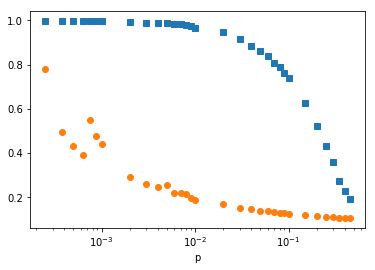

In [6]:
from __future__ import division

import networkx as nx
import pylab as pb

#rho=open('CLphd.txt','w')
N=1000
k=20
prob=[0,0.00025,0.000375,0.0005,0.000625,0.00075,0.000875,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]

C=[]
L = []

niter=1
for p in prob:
    s1=0
    s2=0
    for j in range(niter):
        g2=connected_watts_strogatz_graph(N, k, p)
        av=nx.average_clustering(g2)
        ap=nx.average_shortest_path_length(g2)
        s1=s1+av/niter
        s2=s2+ap/niter
    C.append(s1)
    L.append(s2)
Cp=[n/C[0] for n in C]    
Lp=[n1/L[0] for n1 in L]    
#for i in Cp:
    #print >> rho, i,
    #print >> rho, ''
#for j in Lp:
    #print >> rho, j,
#rho.close()
pb.figure(2)
pb.semilogx(prob,Cp,'s')
pb.semilogx(prob,Lp,'o')
pb.xlabel('p')
pb.show()

In [1]:
import networkx as nx
import random as random

def watts_strogatz_graph_x(n, k,x,seed=None):
    if k>=n:
            raise nx.NetworkXError("k>=n, choose smaller k or larger n")
    if seed is not None:
        random.seed(seed)

    G = nx.Graph()
    G.name="watts_strogatz_graph(%s,%s,%s)"%(n,k,x)
    nodes = list(range(n)) # nodes are labeled 0 to n-1
    # connect each node to k/2 neighbors
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    # rewire edges from each node
    # loop over all nodes in order (label) and neighbors in order (distance)
    # no self loops or multiple edges allowed
    for j in range(1, k // 2+1): # outer loop is neighbors
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        # inner loop in node order
        for u,v in zip(nodes,targets):
            w = random.choice(nodes)
            # Enforce no self-loops or multiple edges
            while w == u or G.has_edge(u, w):
                w = random.choice(nodes)
                if G.degree(u) >= n-1:
                    break # skip this rewiring
            else:
                d = nx.shortest_path_length(G, source=u, target=w)
                p = d*pow(x,(d-1))
                if random.random() < p:
                    G.remove_edge(u,v)
                    G.add_edge(u,w)
                
    return G

In [2]:
def connected_watts_strogatz_graph_x(n, k, x, tries=100, seed=None):
    G = watts_strogatz_graph_x(n, k, x, seed)
    t=1
    while not nx.is_connected(G):
        G = watts_strogatz_graph_x(n, k, x, seed)
        t=t+1
        if t>tries:
            raise nx.NetworkXError("Maximum number of tries exceeded")
    return G

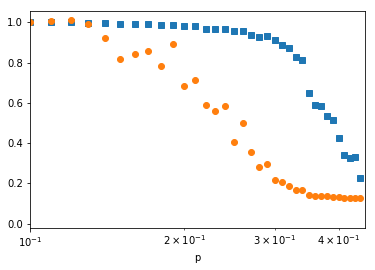

In [7]:
from __future__ import division

import networkx as nx
import pylab as pb

#rho=open('CLphd.txt','w')
N=1000
k=20
prob=[0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,
      0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,
      0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,
      0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,
      0.42,0.43,0.44,45]

C=[]
L = []

niter=1
for p in prob:
    s1=0
    s2=0
    for j in range(niter):
        g2=connected_watts_strogatz_graph_x(N, k, p)
        av=nx.average_clustering(g2)
        ap=nx.average_shortest_path_length(g2)
        s1=s1+av/niter
        s2=s2+ap/niter
    C.append(s1)
    L.append(s2)
Cp=[n/C[0] for n in C]    
Lp=[n1/L[0] for n1 in L]    
#for i in Cp:
    #print >> rho, i,
    #print >> rho, ''
#for j in Lp:
    #print >> rho, j,
#rho.close()
pb.figure(2)
pb.semilogx(prob,Cp,'s')
pb.semilogx(prob,Lp,'o')
pb.xlabel('p')
pb.xlim(0.1,0.45)
pb.show()